**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Antonio Olvera Donlucas
*   MATRÍCULA: A01795617

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [8]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [31]:
response_numeric = response_df.select_dtypes(include=np.number).columns.tolist()

In [32]:
response_object = response_df.select_dtypes(exclude=np.number).columns.tolist()

In [6]:
response_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Music,1007.0,4.731877,0.664049,1.0,5.0,5.0,5.0,5.0
Slow songs or fast songs,1008.0,3.328373,0.833931,1.0,3.0,3.0,4.0,5.0
Dance,1006.0,3.113320,1.170568,1.0,2.0,3.0,4.0,5.0
Folk,1005.0,2.288557,1.138916,1.0,1.0,2.0,3.0,5.0
Country,1005.0,2.123383,1.076136,1.0,1.0,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...
Spending on healthy eating,1008.0,3.557540,1.093750,1.0,3.0,4.0,4.0,5.0
Age,1003.0,20.433699,2.828840,15.0,19.0,20.0,22.0,30.0
Height,990.0,173.514141,10.024505,62.0,167.0,173.0,180.0,203.0
Weight,990.0,66.405051,13.839561,41.0,55.0,64.0,75.0,165.0


In [7]:
response_df.describe(include=object).T

,count,unique,top,freq
Smoking,1002,4,tried smoking,430
Alcohol,1005,3,social drinker,659
Punctuality,1008,3,i am always on time,399
Lying,1008,4,sometimes,549
Internet usage,1010,4,few hours a day,744
Gender,1004,2,female,593
Left - right handed,1007,2,right handed,906
Education,1009,6,secondary school,621
Only child,1008,2,no,754
Village - town,1006,2,city,707


In [33]:
for column in response_object:
    print(response_df[column].value_counts())
    print('-' * 50)

Smoking
tried smoking     430
never smoked      208
current smoker    189
former smoker     175
Name: count, dtype: int64
--------------------------------------------------
Alcohol
social drinker    659
drink a lot       222
never             124
Name: count, dtype: int64
--------------------------------------------------
Punctuality
i am always on time        399
i am often early           327
i am often running late    282
Name: count, dtype: int64
--------------------------------------------------
Lying
sometimes                        549
only to avoid hurting someone    270
everytime it suits me            138
never                             51
Name: count, dtype: int64
--------------------------------------------------
Internet usage
few hours a day            744
less than an hour a day    139
most of the day            124
no time at all               3
Name: count, dtype: int64
--------------------------------------------------
Gender
female    593
male      411
Name: count,

2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


In [30]:
Weight = response_df['Weight']
Weight


0       48.0
1       58.0
2       67.0
3       59.0
4       59.0
        ... 
1005    57.0
1006    80.0
1007    75.0
1008    58.0
1009    72.0
Name: Weight, Length: 1010, dtype: float64

- vemos que la columna es de tipo flotante.

In [18]:

response_df[pd.isna(response_df['Weight'])]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
137,5.0,3.0,4.0,3.0,3.0,5.0,5.0,5.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,right handed,primary school,yes,village,house/bungalow
142,5.0,4.0,4.0,1.0,3.0,2.0,2.0,4.0,4.0,1.0,...,NaN,NaN,NaN,NaN,male,left handed,primary school,no,city,block of flats
164,5.0,4.0,4.0,2.0,1.0,3.0,2.0,4.0,NaN,1.0,...,20.0,188.0,NaN,1.0,male,right handed,secondary school,no,village,house/bungalow
209,5.0,2.0,4.0,3.0,3.0,4.0,3.0,2.0,5.0,4.0,...,21.0,NaN,NaN,1.0,male,right handed,secondary school,no,village,house/bungalow
276,5.0,4.0,5.0,3.0,5.0,2.0,2.0,5.0,5.0,4.0,...,21.0,NaN,NaN,2.0,female,right handed,college/bachelor degree,no,village,house/bungalow
405,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,...,20.0,165.0,NaN,1.0,female,left handed,secondary school,no,city,block of flats
453,5.0,4.0,2.0,2.0,1.0,1.0,5.0,3.0,4.0,2.0,...,19.0,169.0,NaN,1.0,female,right handed,secondary school,yes,village,house/bungalow
495,5.0,3.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,2.0,...,20.0,NaN,NaN,2.0,female,right handed,secondary school,no,city,block of flats
509,4.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,1.0,1.0,...,16.0,168.0,NaN,1.0,female,right handed,secondary school,yes,village,house/bungalow
551,5.0,4.0,3.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,...,16.0,NaN,NaN,NaN,female,right handed,secondary school,no,village,block of flats


- Tenemos valores nulos en la columna.
- Podemos rellenar con el promedio los faltantes para evitar eliminarlos.

In [21]:
response_df['Weight'].fillna(value=response_df['Weight'].mean(), inplace=True)

In [22]:
response_df['Weight'] = response_df['Weight'].astype(int)


**Ya que la columna es de tipo numérica se debe de elegir un histograma ya que no tenemos un categoría que graficar en un gráfico de barras**

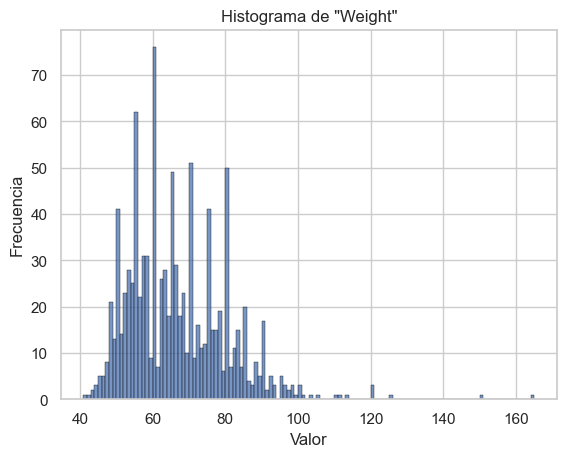

In [25]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear un histograma con Seaborn
sns.histplot(data=response_df, x='Weight', bins=range(min(response_df['Weight']), max(response_df['Weight']) + 1), edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de "Weight"')

# Mostrar el histograma
plt.show()

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [35]:
asimetria = response_df.loc[:, "Weight"].skew()
asimetria

1.2237251927527477

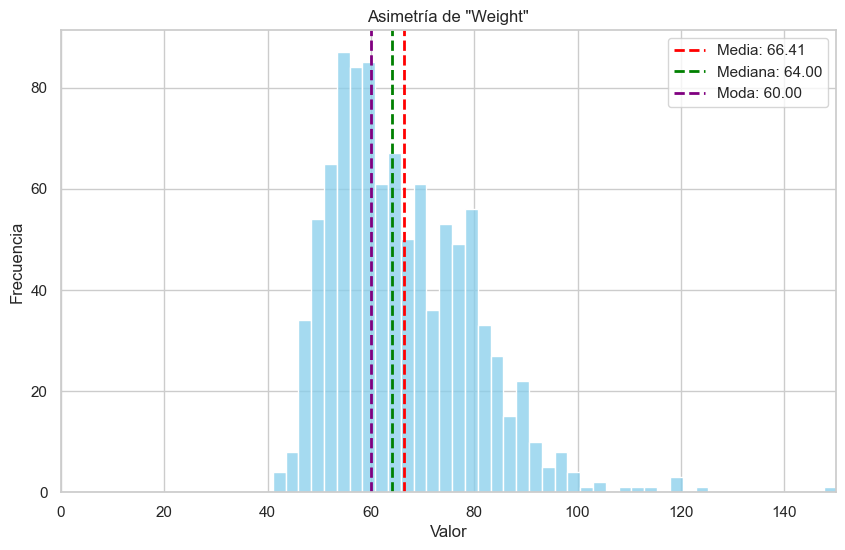

In [39]:
media = response_df['Weight'].mean()
mediana = response_df['Weight'].median()
moda = response_df['Weight'].mode().iloc[0]

plt.figure(figsize=(10, 6))
sns.histplot(response_df['Weight'], kde=False, color='skyblue', bins=50)
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='purple', linestyle='dashed', linewidth=2, label=f'Moda: {moda:.2f}')
plt.xlim(0,150)
# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.title('Asimetría de "Weight"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

**Asimetría ligeramente a la derecha, por lo que es una asimetría positiva**

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [48]:
porcentaje_faltantes = response_df['Weight'].isna().mean() * 100
numero_d_valores_faltantes = response_df['Weight'].isna().sum() 

porcentaje_faltantes = f'Porcentaje de valores faltantes: {porcentaje_faltantes:.2f}%'
numero_d_valores_faltantes = f'Número de valores faltantes: {numero_d_valores_faltantes}' 

In [49]:
numero_d_valores_faltantes

'Número de valores faltantes: 20'

In [46]:
porcentaje_faltantes

'Porcentaje de valores faltantes: 1.98%'

5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [50]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [51]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Age:


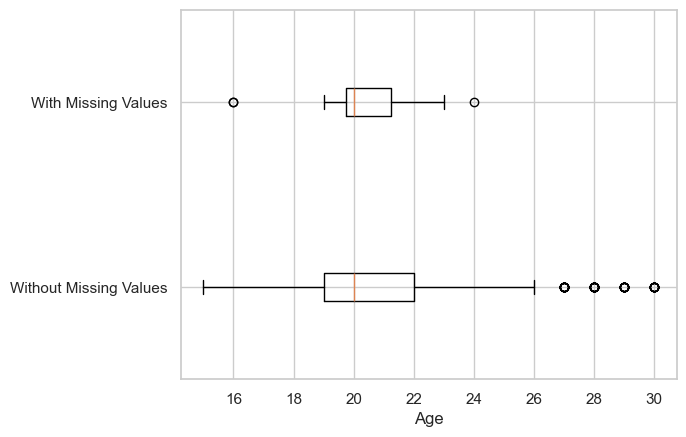

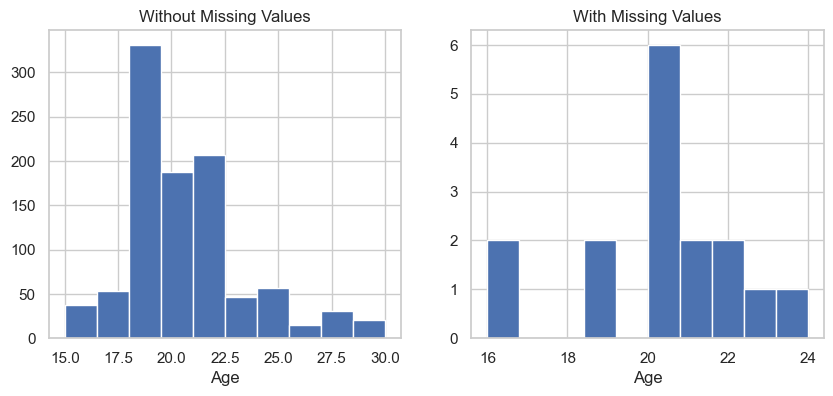

p-value of t-test: 0.7258243979822129
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Number of siblings:


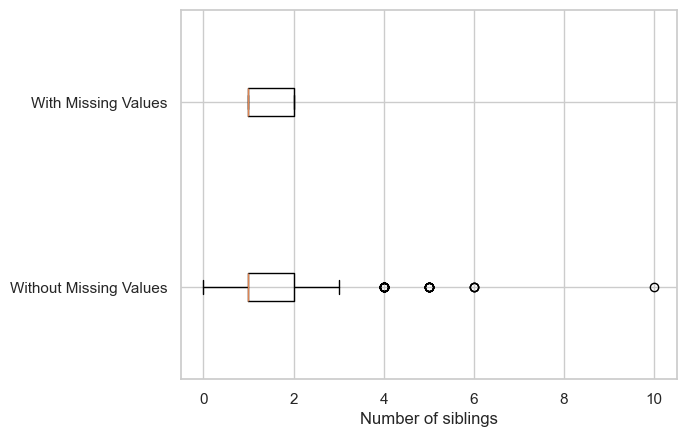

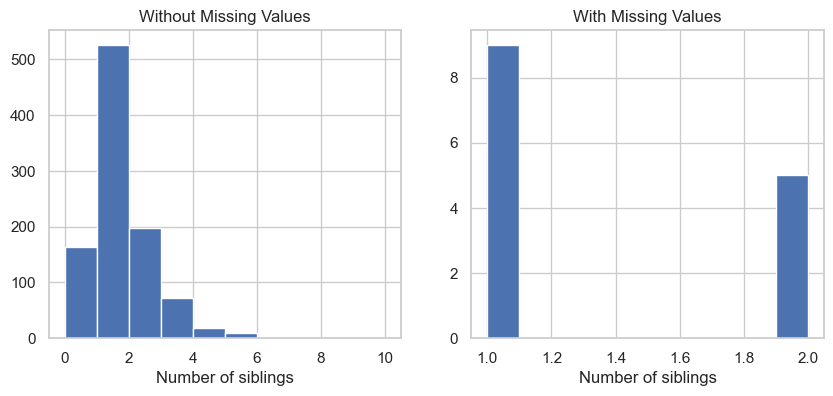

p-value of t-test: 0.8255092107556896
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Gender:


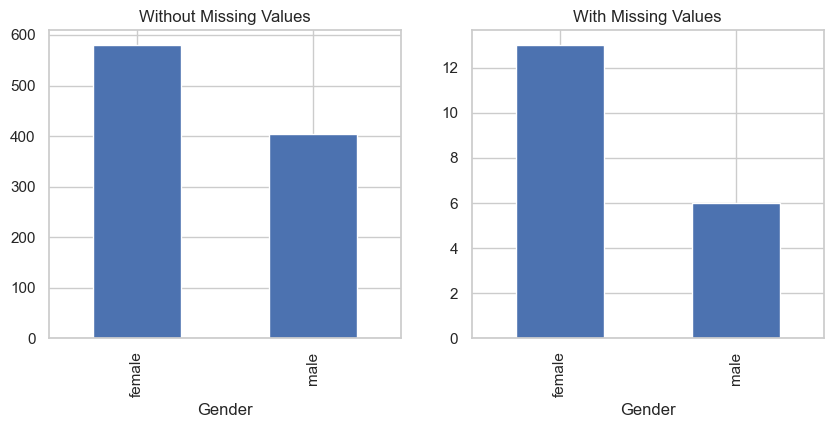

p-value of Chi_squared test: 0.5472167199163878
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Education:


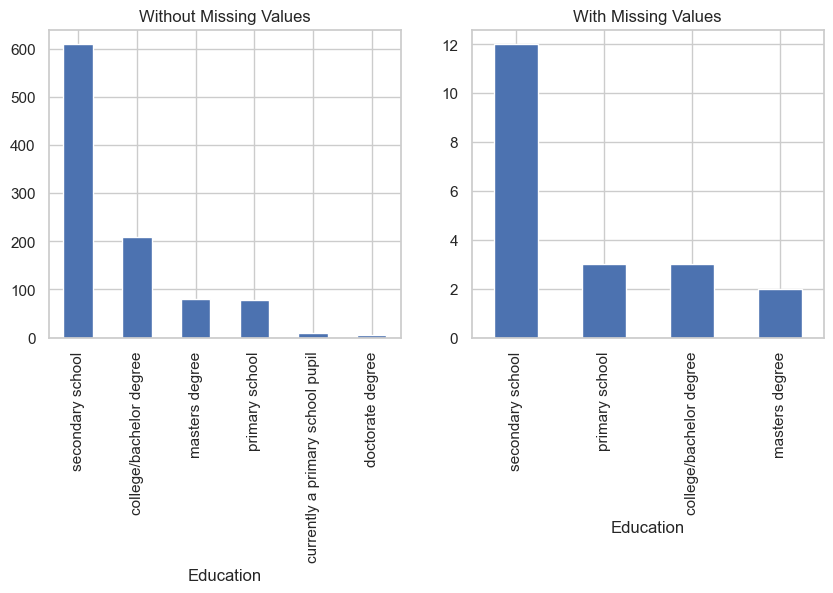

p-value of Chi_squared test: 0.8424822989541867
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [52]:
categorical_attributes = ['Gender', 'Education']
numerical_attributes = ['Age', 'Number of siblings']

BM_MV = response_df.Weight.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(response_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(response_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

**AGE**
- Se puede ver en los gráficos que no es mucho el cambio que existen en las dos poblaciones.
- incluso el p-value confirma que este no es mucha la diferencia para sospechar una tendencia en los dos grupos.

**Numero de hermanos**
- En los gráficos de vajas y bigotes vemos que es muy similar en als dospoblaciones.
- Para el de barras se ve que existe una tendencia en los dos de mayor numero con1 y 2.
- El p-value confirma que ls significancia es baja por lo que no se debe de tener una realcion con los faltantes de Weight.

**Genero**
- Se alcanza a ver un comportamiento similar entre las dos poblaciones por lo que no exsite relacion para faltantes.

**Education**
- LA tendencia en ambos gráficos se nota muy parecido, si bien no se encuentran los campos de a primary school pupil y doctorate degree se puede inferrir que donde aparence tiene una poblacion muy pequeña por lo que no es significativo para decir que existe una realcion con los faltantes.

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

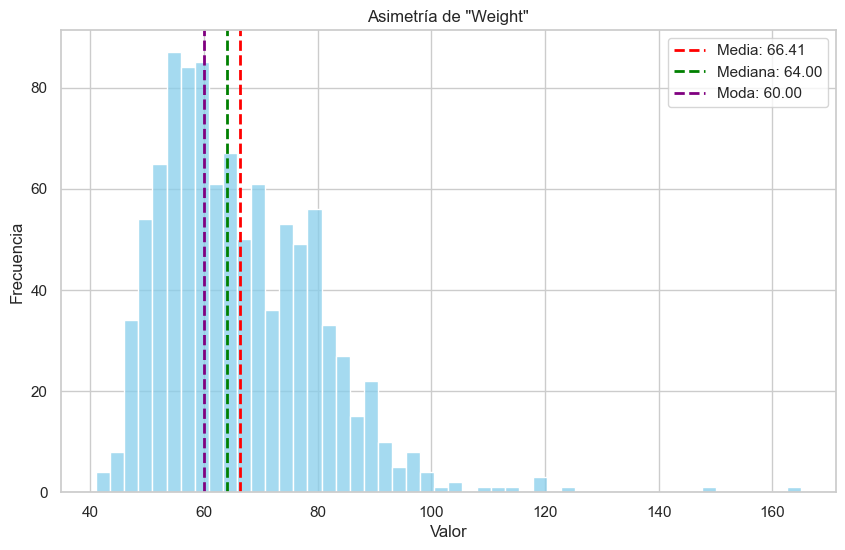

In [54]:
media = response_df['Weight'].mean()
mediana = response_df['Weight'].median()
moda = response_df['Weight'].mode().iloc[0]

plt.figure(figsize=(10, 6))
sns.histplot(response_df['Weight'], kde=False, color='skyblue', bins=50)
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='purple', linestyle='dashed', linewidth=2, label=f'Moda: {moda:.2f}')
# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.title('Asimetría de "Weight"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

- Como vemos se tiene una ligera proporción a la izquierda por lo que considero que podría ser mejor usar la **MODA** como mediad de tendencia central para sustitui los valores faltantes. También se podría usar la Mediana sin embargo veo mejor el uso de la moda.

7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

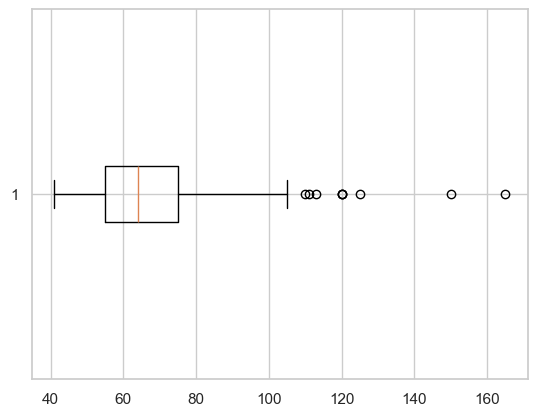

In [55]:
fig = plt.boxplot(response_df.Weight.dropna(),vert=False)

**Utilizando IQR para outliers**

In [56]:
Q1 = response_df.Weight.quantile(0.25)

Q3 = response_df.Weight.quantile(0.75)

IQR = Q3-Q1

BM = (response_df.Weight > (Q3+1.5 *IQR)) | (response_df.Weight < (Q1-1.5 *IQR))

response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


- Eliminando los outliers de dataframe original.

In [57]:
response_df = response_df[~BM]

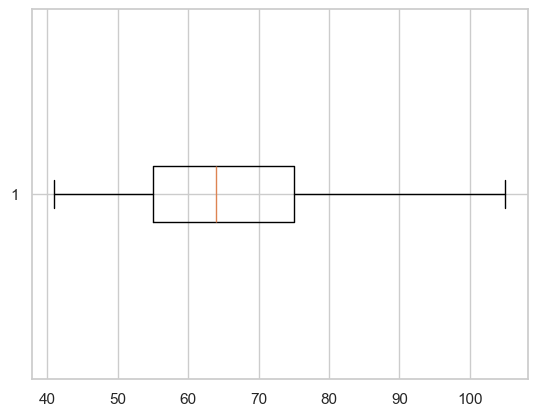

In [58]:
fig = plt.boxplot(response_df.Weight.dropna(),vert=False)

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

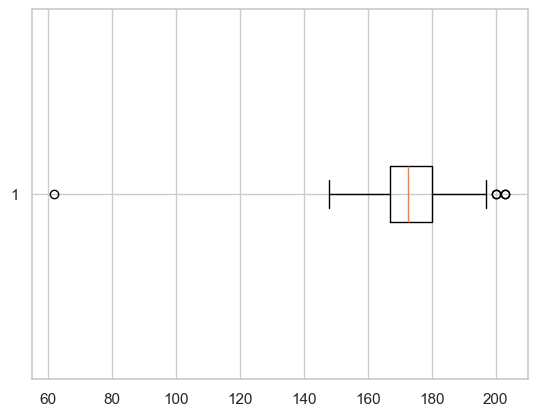

In [59]:
fig = plt.boxplot(response_df.Height.dropna(),vert=False)

In [60]:
Q1 = response_df.Height.quantile(0.25)

Q3 = response_df.Height.quantile(0.75)

IQR = Q3-Q1

BM = (response_df.Height > (Q3+1.5 *IQR)) | (response_df.Height < (Q1-1.5 *IQR))

response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
97,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,19.0,200.0,75.0,1.0,male,right handed,primary school,no,village,block of flats
220,5.0,3.0,4.0,3.0,3.0,4.0,2.0,1.0,3.0,1.0,...,18.0,200.0,90.0,2.0,male,right handed,secondary school,no,village,house/bungalow
547,5.0,4.0,1.0,4.0,2.0,5.0,3.0,1.0,4.0,5.0,...,21.0,203.0,80.0,2.0,male,left handed,secondary school,no,village,house/bungalow
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,20.0,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow
799,5.0,3.0,1.0,2.0,3.0,4.0,5.0,2.0,4.0,5.0,...,18.0,203.0,89.0,2.0,male,right handed,secondary school,yes,city,block of flats


In [61]:
response_df = response_df[~BM]
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


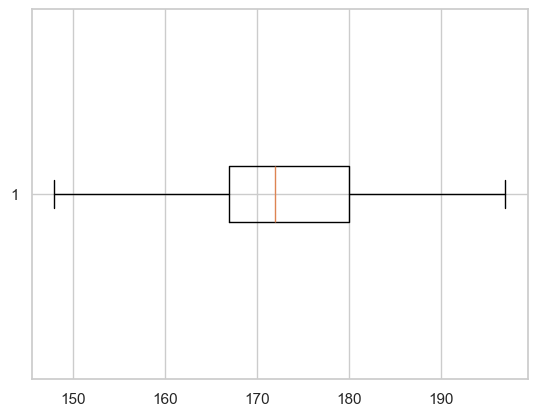

In [62]:
fig = plt.boxplot(response_df.Height.dropna(),vert=False)

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [77]:
response_df["BMI"] = response_df["Weight"] / ((response_df["Height"]/100)**2)

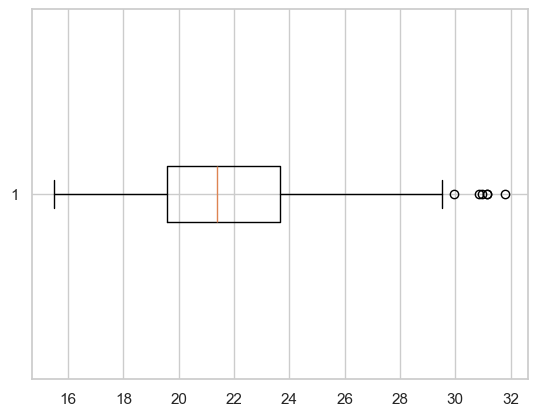

In [78]:
fig = plt.boxplot(response_df.BMI.dropna(),vert=False)

In [79]:
Q1 = response_df.BMI.quantile(0.25)

Q3 = response_df.BMI.quantile(0.75)

IQR = Q3-Q1

BM = (response_df.BMI > (Q3+1.5 *IQR)) | (response_df.BMI < (Q1-1.5 *IQR))

response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,BMI
42,5.0,5.0,2.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,...,170.0,90.0,0.0,female,right handed,secondary school,yes,city,block of flats,31.141869
151,5.0,4.0,3.0,1.0,1.0,3.0,2.0,2.0,4.0,4.0,...,180.0,100.0,1.0,male,right handed,secondary school,no,city,block of flats,30.864198
156,5.0,4.0,2.0,4.0,3.0,4.0,2.0,3.0,5.0,2.0,...,177.0,97.0,1.0,male,left handed,doctorate degree,yes,city,block of flats,30.961729
357,5.0,4.0,3.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,...,179.0,96.0,0.0,male,right handed,secondary school,yes,city,block of flats,29.961612
401,5.0,3.0,2.0,1.0,3.0,1.0,3.0,2.0,5.0,4.0,...,170.0,90.0,1.0,female,right handed,secondary school,no,village,block of flats,31.141869
636,5.0,3.0,3.0,5.0,4.0,3.0,3.0,4.0,4.0,1.0,...,171.0,93.0,2.0,male,right handed,doctorate degree,no,village,house/bungalow,31.804658


10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

In [72]:
response_object

['Smoking',
 'Alcohol',
 'Punctuality',
 'Lying',
 'Internet usage',
 'Gender',
 'Left - right handed',
 'Education',
 'Only child',
 'Village - town',
 'House - block of flats']

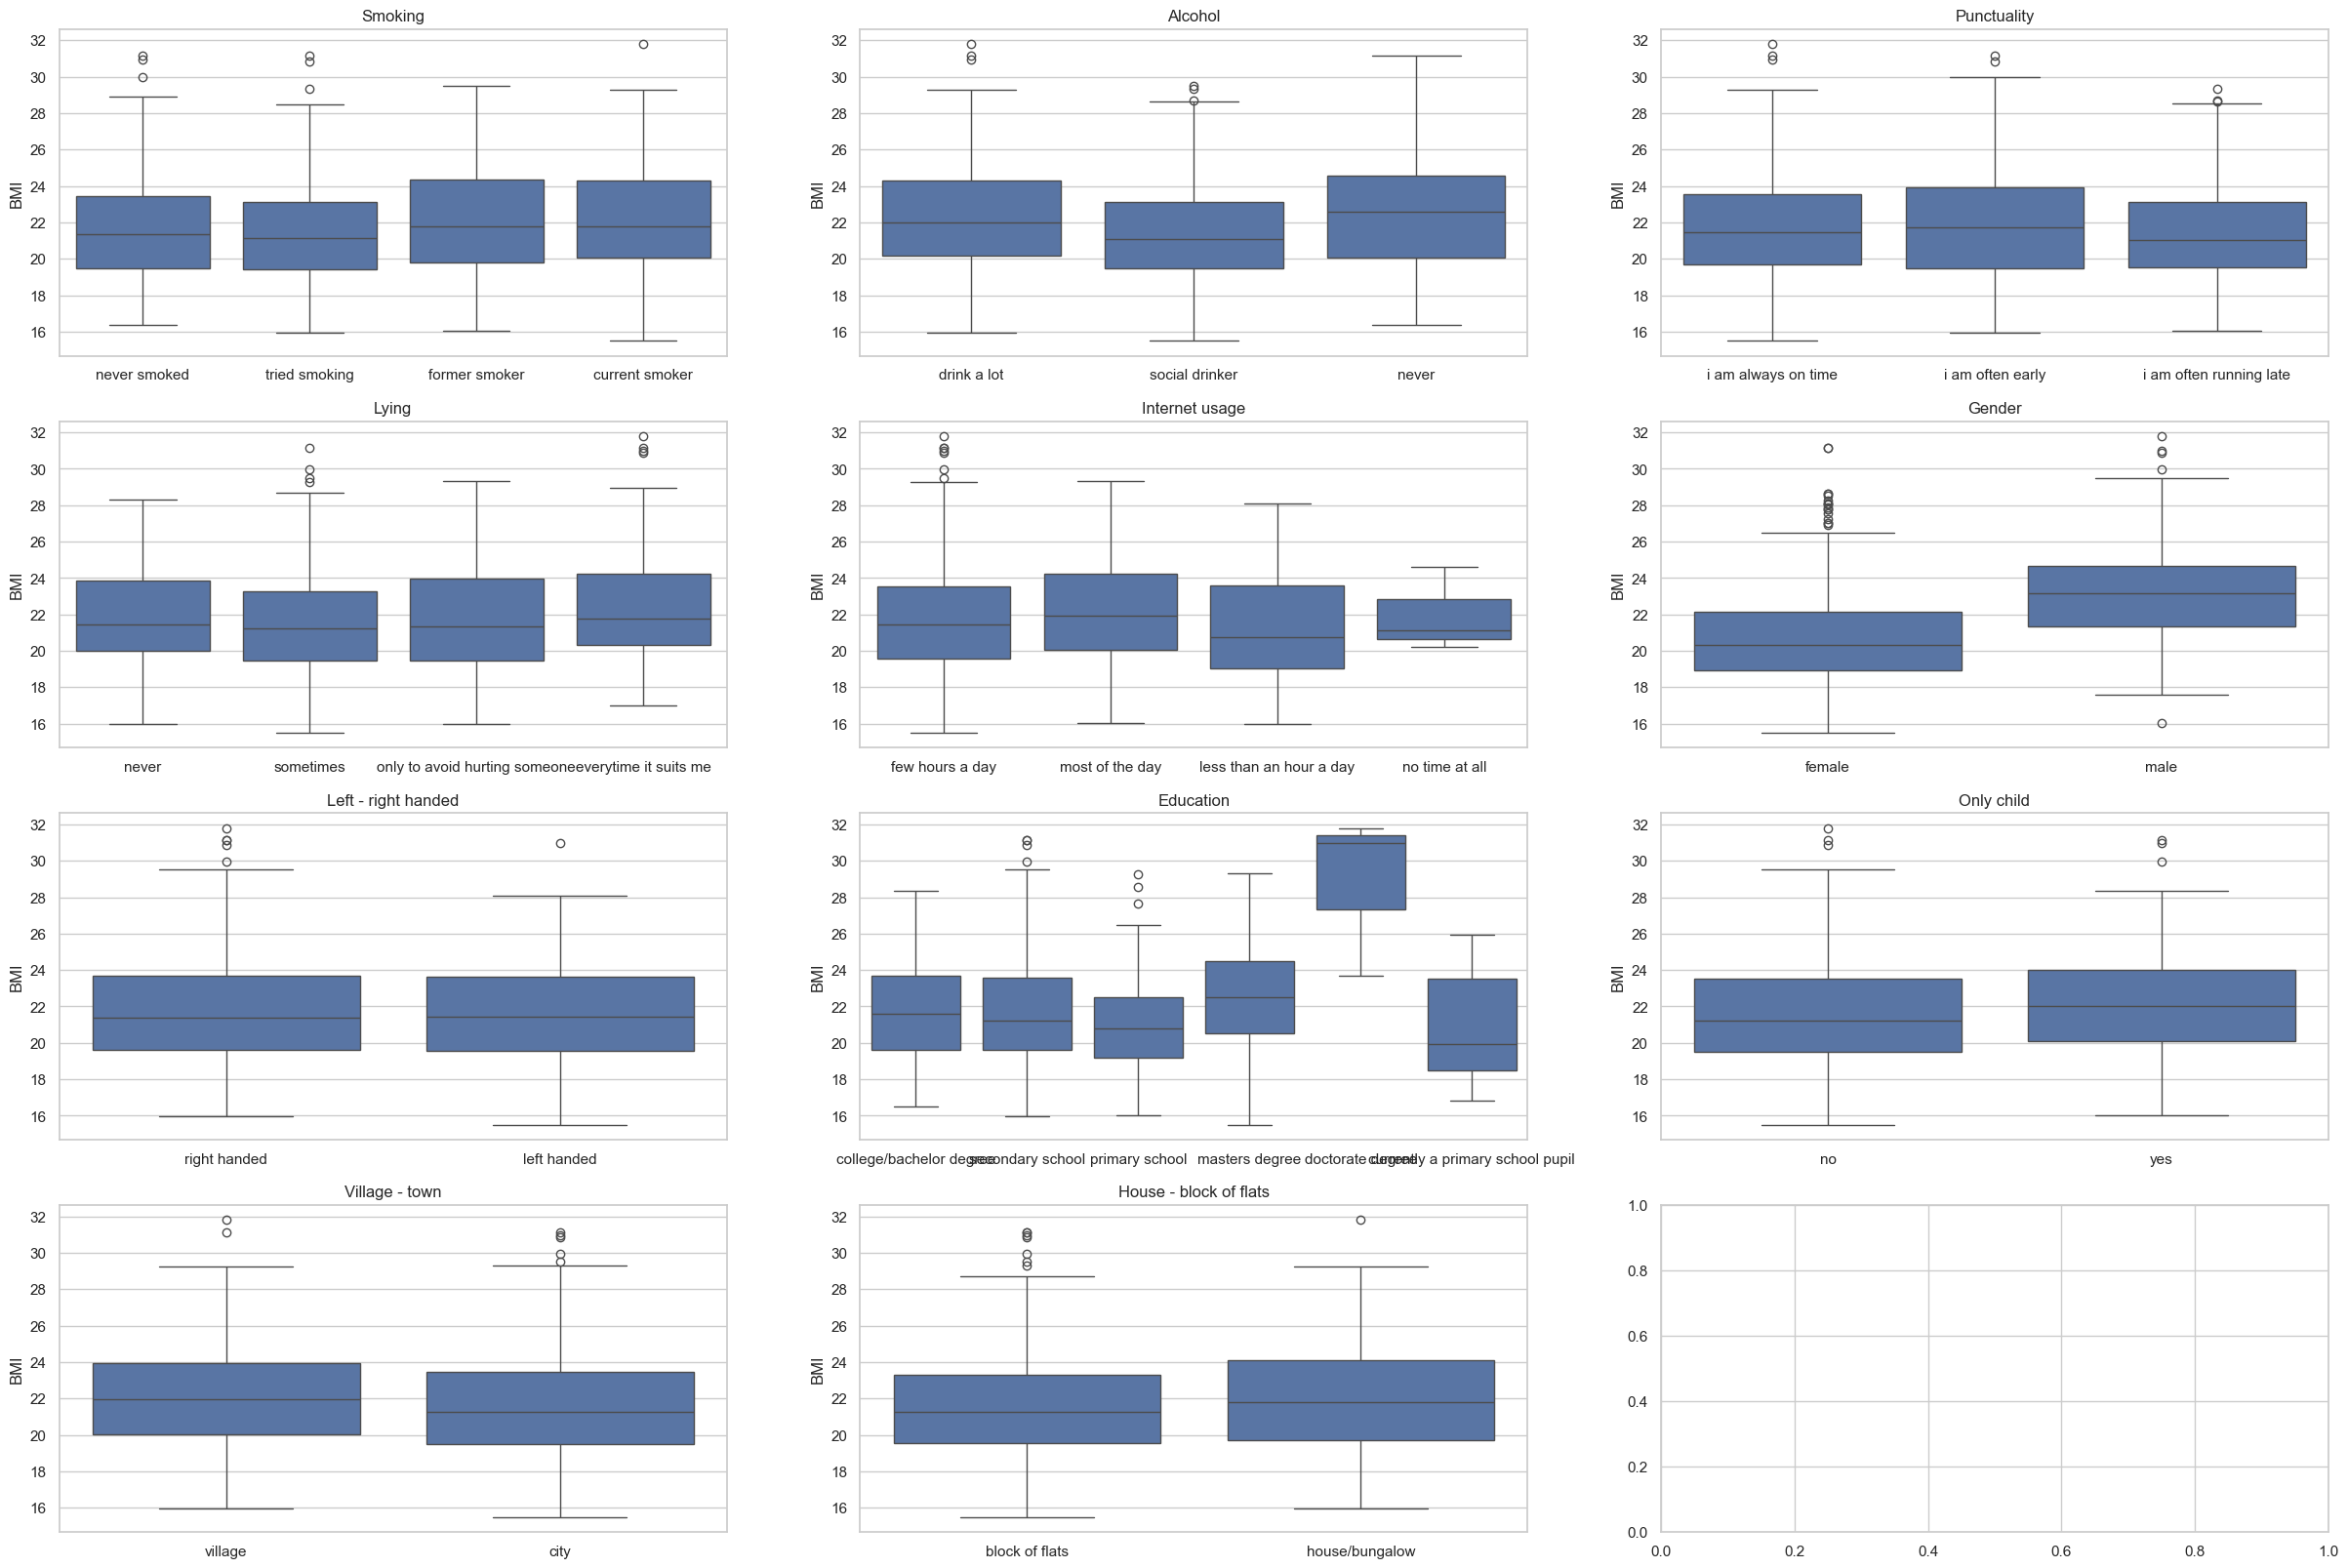

In [80]:
hue_col = 'BMI'
fig, axes = plt.subplots(4, 3, figsize=(30, 20))
axes = axes.ravel()
for col, ax in zip(response_df[response_object], axes):
    sns.boxplot(x=response_df[col], y=response_df[hue_col], ax=ax)
    ax.set(title=f'{col}', xlabel=None)

plt.show()

- Vale la pena resaltar que para la categoria de educación vemos muy alto el BMI por lo qu sugiere que se encuentran mas en una obesidad/sobrepeso
- Están mas altos los valores para los hombres.
- Se muestran varios aourliers para las personas que usan bastante horas el internet.
- Hay mas out liers para los diestros, puede deberse a que existen mayormente mas en la muestra.
